In [1]:
import cellpose
from cellpose import models
from tnia.plotting.plt_helper import mask_overlay
from skimage.io import imread, imsave
import os
import glob
from pathlib import Path



Welcome to CellposeSAM, cellpose v4.0.1! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




In [ ]:
 major_number = cellpose.version.split('.')[0]
print(f"Cellpose version: {cellpose.version} (major number: {major_number})")

if major_number == '3':
    model = models.Cellpose(gpu=True, model_type='cyto3')
elif major_number == '4':
    model = models.CellposeModel(gpu=True)

Cellpose version: 4.0.1 (major number: 4)


Processing D:\images\tnia-python-images\imagesc\2025_05_22_Blood_Cells\archive\imagescselect\images\BloodImage_00038_jpg.rf.ffa23e4b5b55b523367f332af726eae8.jpg
Percentiles: 1st=111.0, 99th=214.0
Processing D:\images\tnia-python-images\imagesc\2025_05_22_Blood_Cells\archive\imagescselect\images\BloodImage_00134_jpg.rf.0d9da503b62e0034a2819a39cce7e7d9.jpg
Percentiles: 1st=114.0, 99th=213.0
Processing D:\images\tnia-python-images\imagesc\2025_05_22_Blood_Cells\archive\imagescselect\images\BloodImage_00160_jpg.rf.894e8c8c7179ec9958a4d6c7b6b45616.jpg
Percentiles: 1st=123.0, 99th=206.0
Processing D:\images\tnia-python-images\imagesc\2025_05_22_Blood_Cells\archive\imagescselect\images\BloodImage_00302_jpg.rf.911302bb5caaf9467e101afeece651e1.jpg
Percentiles: 1st=124.0, 99th=213.0


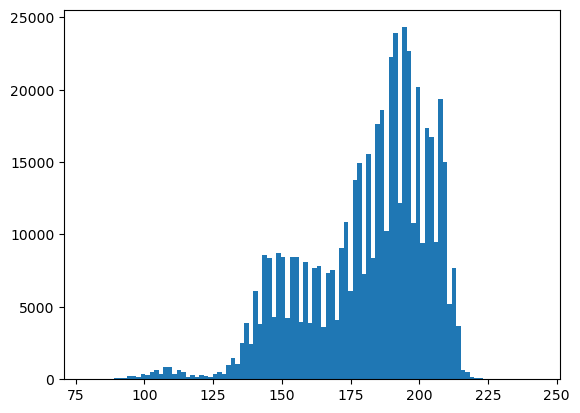

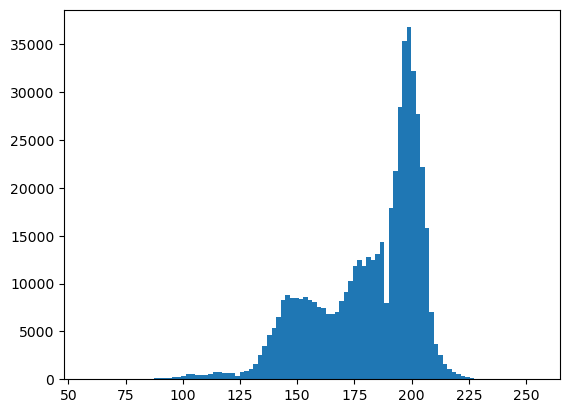

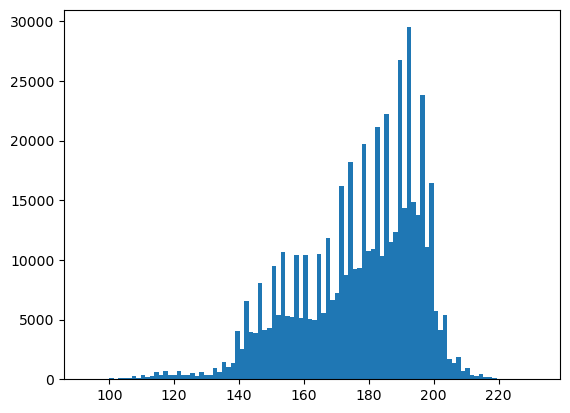

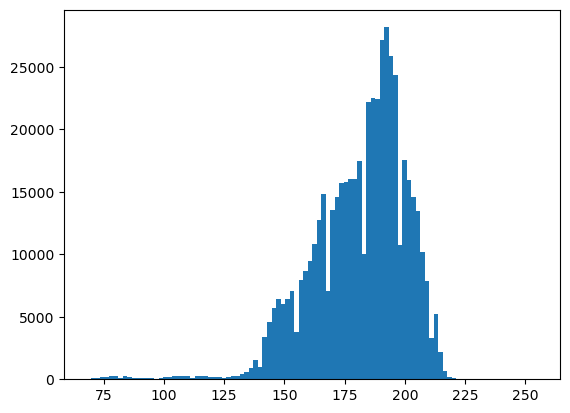

In [11]:
import matplotlib.pyplot as plt
import numpy as np

parent_path = r"D:\images\tnia-python-images\imagesc\2025_05_22_Blood_Cells"
im_path = os.path.join(parent_path, "archive", "imagescselect", "images")
#im_path = r"D:\images\tnia-python-images\imagesc\2025_05_23_Blood_Cells2\select"

# get all jpg files in the directory

im_files = glob.glob(os.path.join(im_path, "*.jpg"))

ims = []
ims_to_display = []
titles = []

for im_file in im_files:    
    print(f"Processing {im_file}")
    im = imread(im_file)

    # first and 99th percentile
    p1 = np.percentile(im, 1)
    p99 = np.percentile(im, 99)
    print(f"Percentiles: 1st={p1}, 99th={p99}")
    # show hist
    fig, ax = plt.subplots()
    ax.hist(im.ravel(), bins=100)
    seg = model.eval(im)
    overlay = mask_overlay(im, seg[0])
    imsave(im_file.replace(".jpg", f"_seg_cp{major_number}.png"), overlay)
    ims_to_display.append(im)
    titles.append(os.path.basename(im_file).split("_jpg")[0])
    ims_to_display.append(overlay)
    titles.append(os.path.basename(im_file).split("_jpg")[0] + "_seg_cp" + major_number)

In [ ]:
import numpy as np
all_pixel = np.array(ims_to_display).flatten()

print(all_pixel.shape)

# 1st and 99th percentile
p1 = np.percentile(all_pixel, 1)
p99 = np.percentile(all_pixel, 99)
print(f"1st percentile: {p1}, 99th percentile: {p99}")

(4153344,)
1st percentile: 0.0, 99th percentile: 212.0


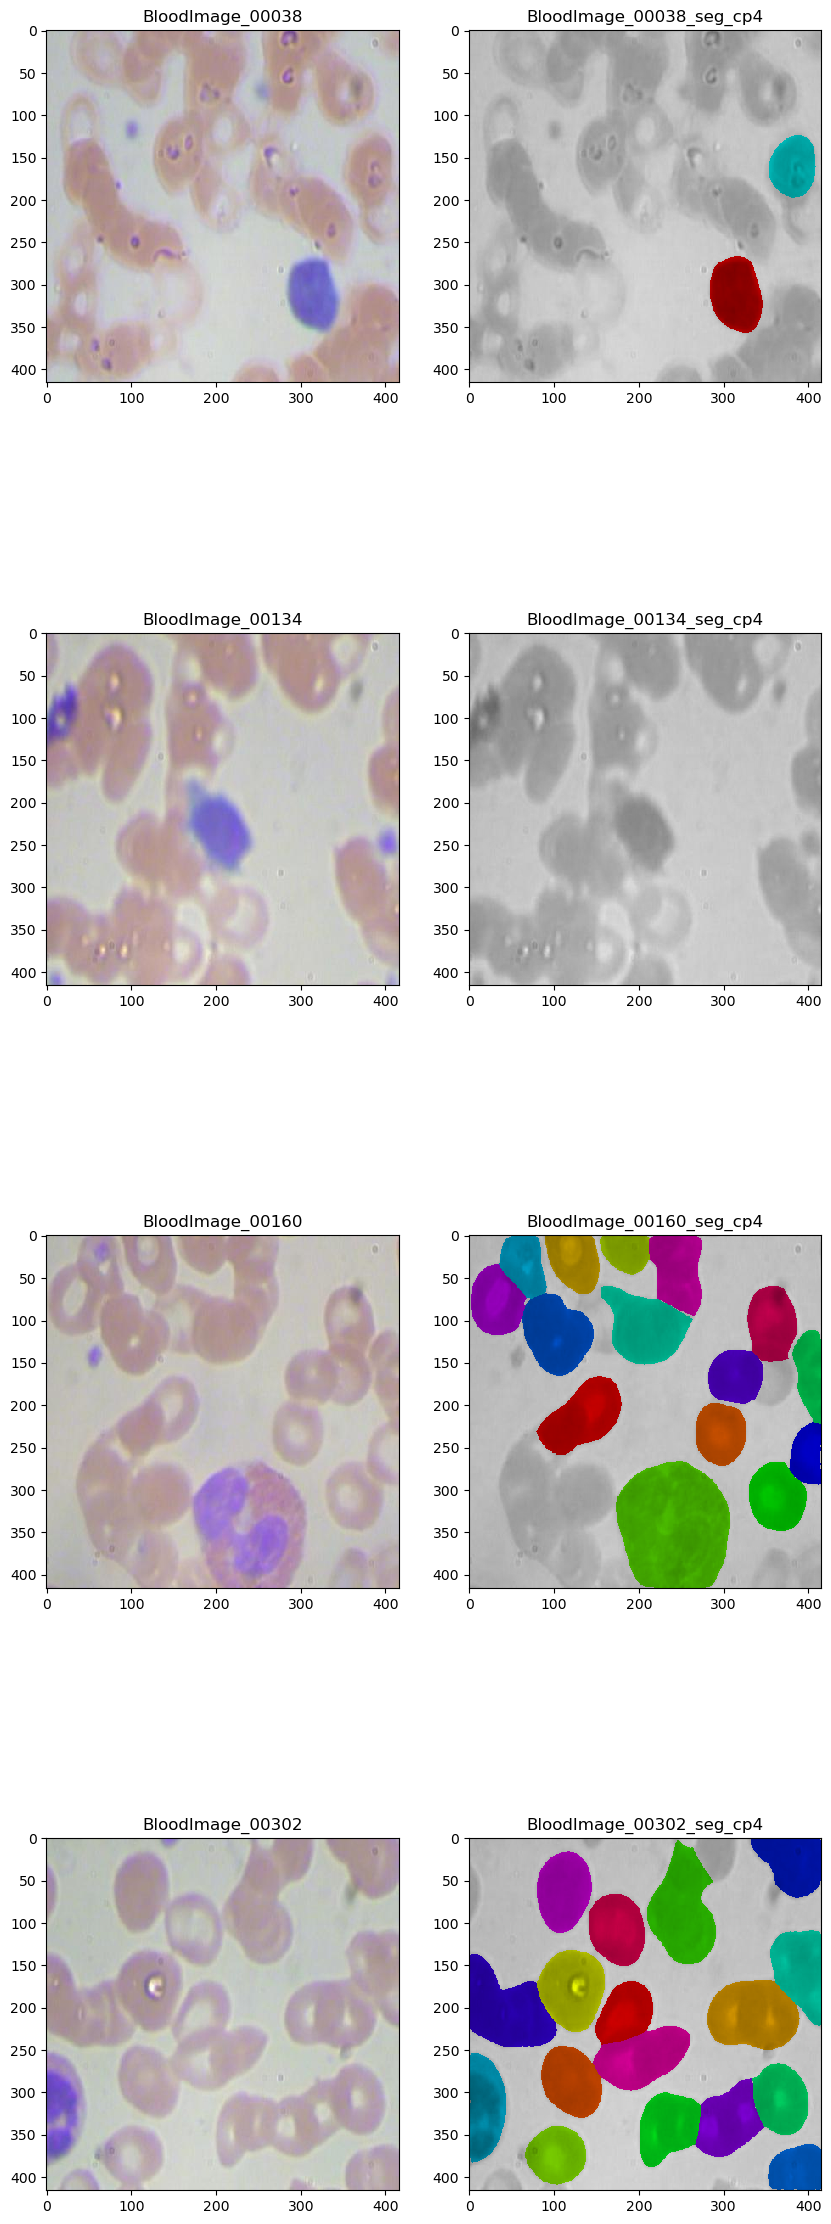

In [ ]:
from tnia.plotting.plt_helper import imshow_multi2d


fig = imshow_multi2d(ims_to_display, titles, len(im_files), 2, width=10, height=30)
fig.savefig(os.path.join(parent_path, f"cellpose_segmentation_{major_number}.png"), dpi=300, bbox_inches='tight')